## **Assignment ML9**
### Predicting Diabetes using Logistic Regression


### **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('ggplot') 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### **2. Load Dataset**

#### **Dataset information**:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

##### **Columns**:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (
6. BMI: Body mass index (Weight (kg)/(Height (m)^2))
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

##### Data Source: 

[pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)




In [2]:
filepath = 'https://raw.githubusercontent.com/Hutaf/SDA-Machine-Learning/main/Assignment_ML9/Data/diabetes.csv'
data = pd.read_csv(filepath)

### **3. Data Exploration and Visualization**

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#get correlations of each features in dataset
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


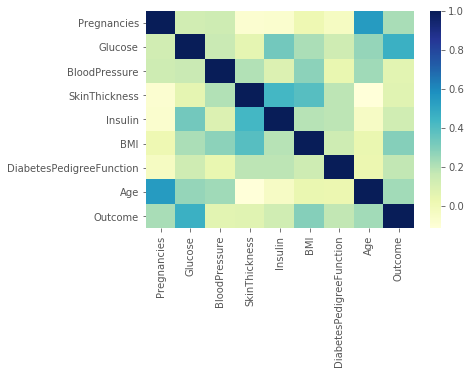

In [7]:
# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu" )

Text(0.5,1,'Count plot for Target Variable')

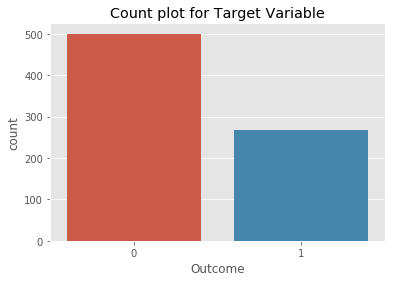

In [8]:
sns.countplot(x='Outcome', data=data)
plt.title("Count plot for Target Variable")

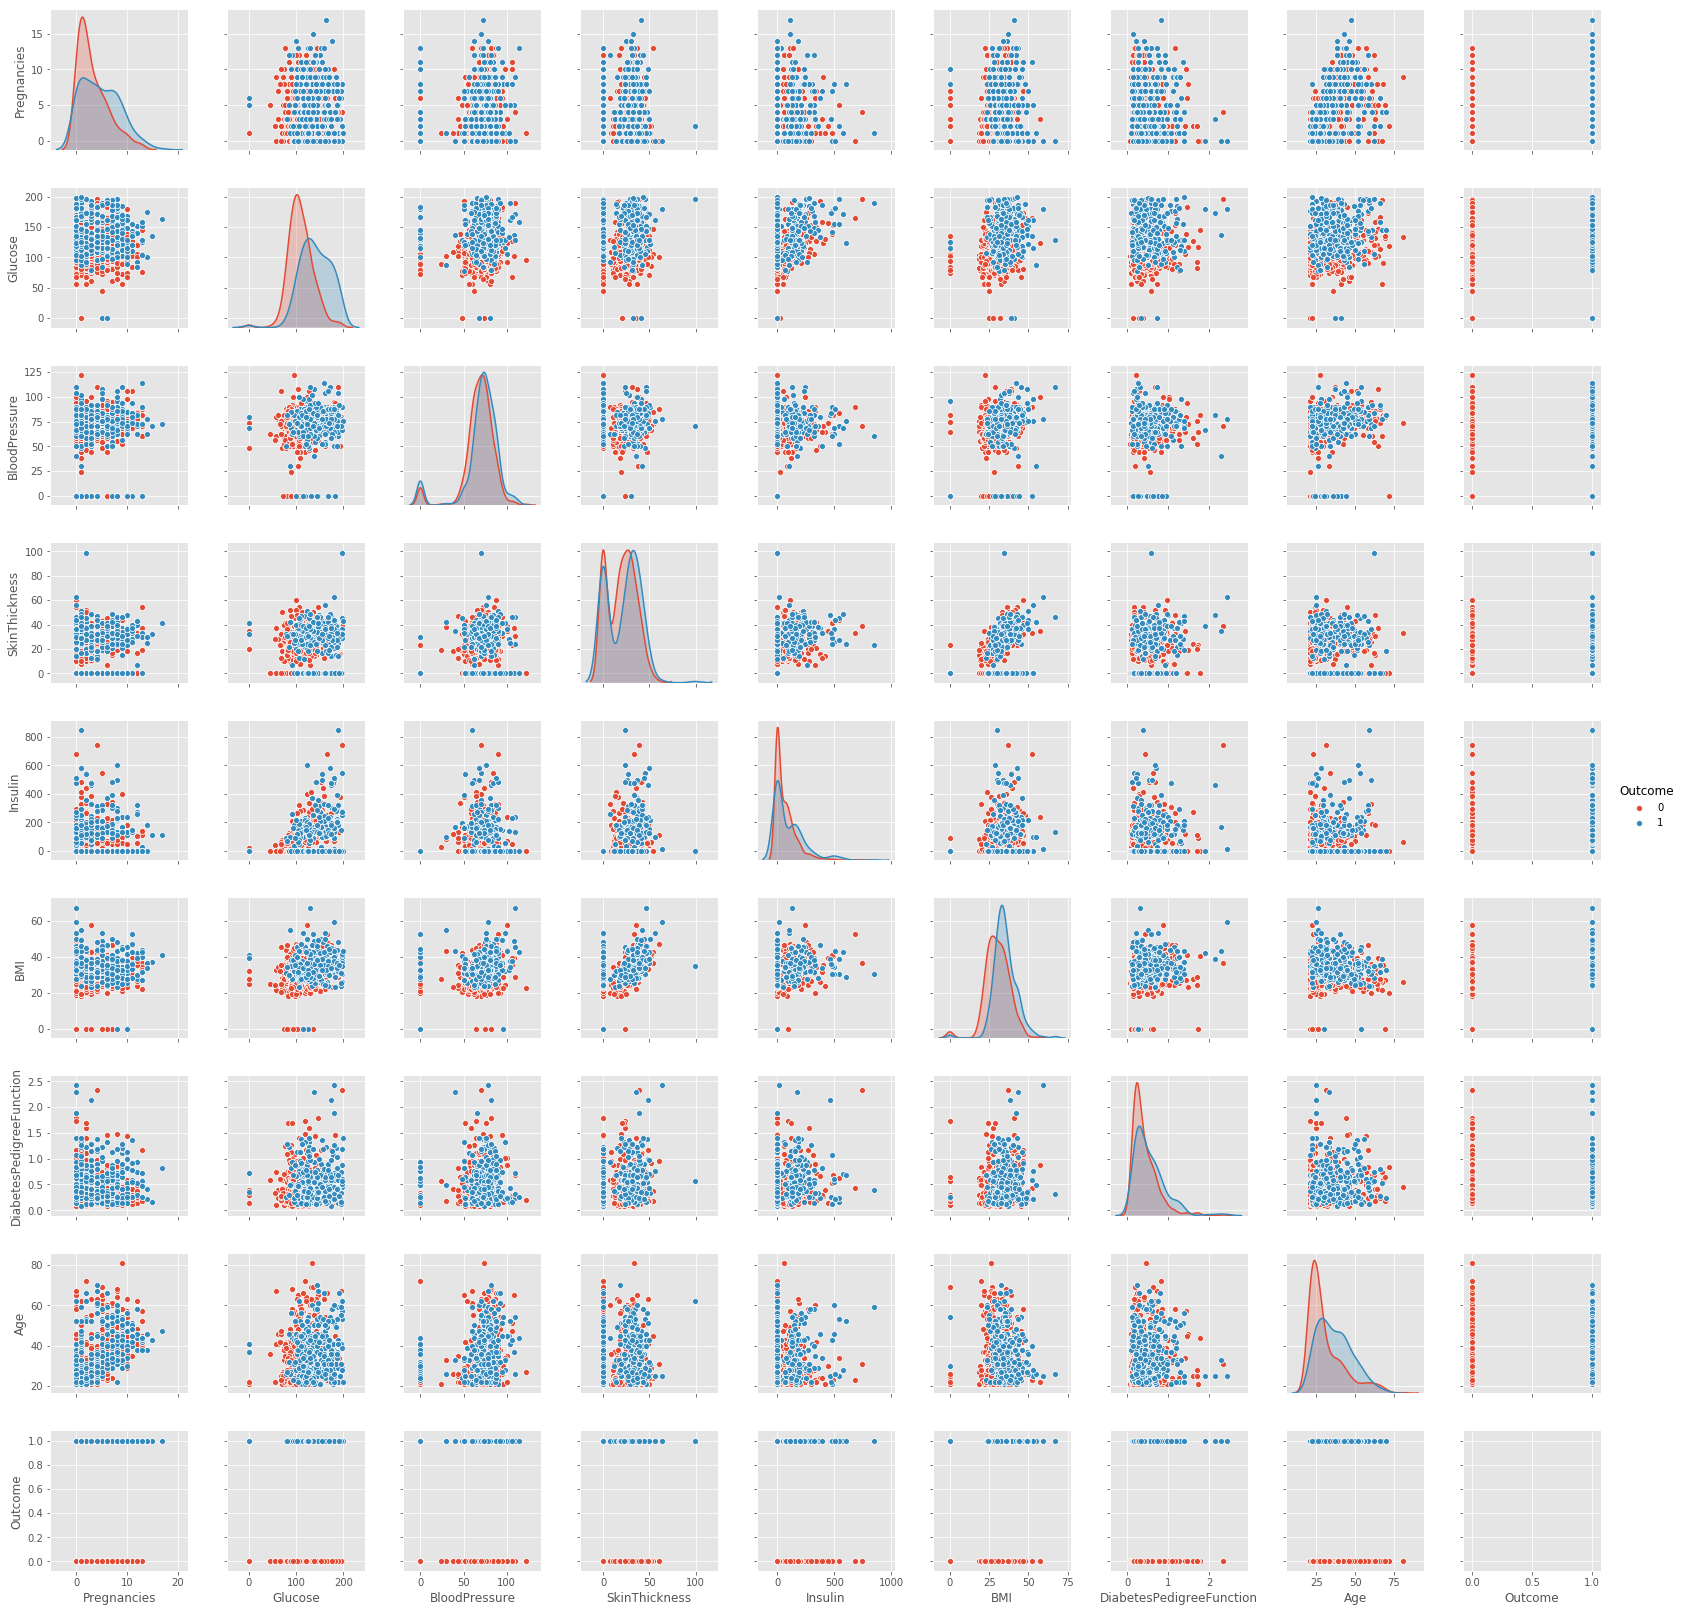

In [9]:
sns.pairplot(data=data,hue="Outcome")

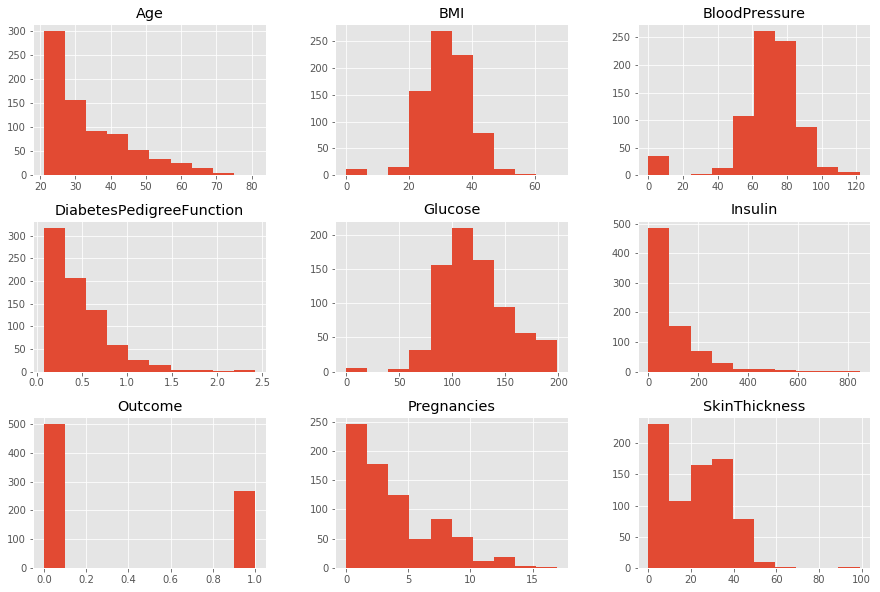

<Figure size 432x288 with 0 Axes>

In [10]:
# histograms
data.hist(figsize=(15,10))
plt.figure();

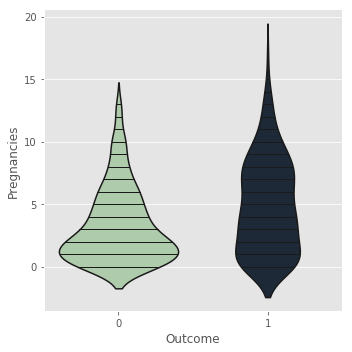

In [11]:
sns.catplot(x="Outcome", y="Pregnancies", 
            kind="violin", split=True, 
            palette="ch:r=-.5,l=.75",
            inner="stick", 
            data=data)

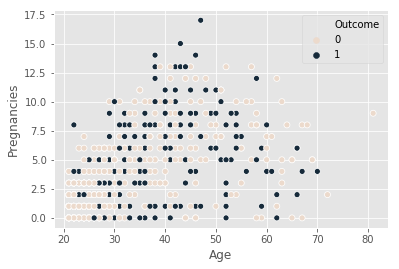

In [12]:
sns.scatterplot(x='Age',  y='Pregnancies', hue='Outcome',
                data= data, 
                legend = 'full',
                palette="ch:r=-.7,l=.87")

{'boxes': [<matplotlib.lines.Line2D at 0x7f8f934468d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8f93451190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f93451ad0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8f93451690>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8f93446950>,
  <matplotlib.lines.Line2D at 0x7f8f9345c7d0>]}

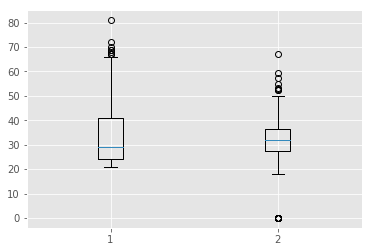

In [13]:
plt.boxplot([data['Age'], data['BMI']])

### **4. Data Modeling** 

In [14]:
def evaluation(y, y_pred):
    print("MSE: {}".format(mean_squared_error(y, y_pred)))
    print("Accuracy Score:", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("Recall:", recall_score(y, y_pred))
    print("F1 Score:", f1_score(y, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    cm = pd.crosstab(y, y_pred)
    sns.heatmap(cm, annot=True, cmap="YlGnBu" )

In [15]:
y = np.array(data['Outcome'])
X = np.array(data.drop(columns=['Outcome'], axis=1))

In [16]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic regressin Report:
MSE: 0.24025974026
('Accuracy Score:', 0.7597402597402597)
('Precision:', 0.68)
('Recall:', 0.6181818181818182)
('F1 Score:', 0.6476190476190475)
('Confusion Matrix:\n', array([[83, 16],
       [21, 34]]))


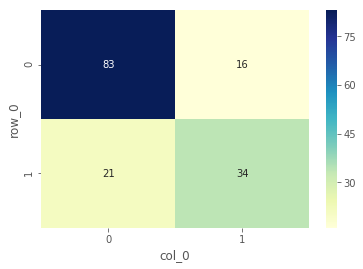

In [17]:
# W/O Scaling or Normalization
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
print("Logistic regressin Report:")
evaluation(y_test,y_pred)

Logistic regressin Report (Standard Scaling):
MSE: 0.246753246753
('Accuracy Score:', 0.7532467532467533)
('Precision:', 0.6491228070175439)
('Recall:', 0.6727272727272727)
('F1 Score:', 0.6607142857142858)
('Confusion Matrix:\n', array([[79, 20],
       [18, 37]]))


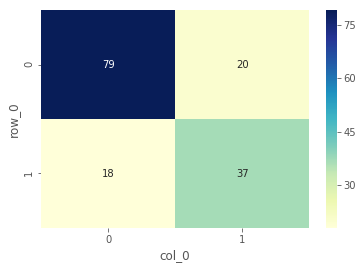

In [18]:
# With Scaling 
SS = StandardScaler()

X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform(X_test)

lr = LogisticRegression(max_iter=150)
lr.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test_scaled)
print("Logistic regressin Report (Standard Scaling):")
evaluation(y_test,y_pred)

Logistic regressin Report (Normalized Data):
MSE: 0.246753246753
('Accuracy Score:', 0.7532467532467533)
('Precision:', 0.6491228070175439)
('Recall:', 0.6727272727272727)
('F1 Score:', 0.6607142857142858)
('Confusion Matrix:\n', array([[79, 20],
       [18, 37]]))


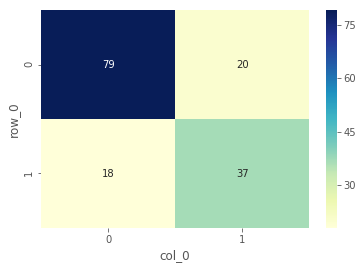

In [19]:
# Normalize the data 
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

X_train_norm = (X_train - means)/stds
X_test_norm = (X_test- means)/stds

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_norm,y_train)

y_pred = lr.predict(X_test_norm)
print("Logistic regressin Report (Normalized Data):")
evaluation(y_test,y_pred)

Logistic regressin Report (MinMax Scaling):
MSE: 0.220779220779
('Accuracy Score:', 0.7792207792207793)
('Precision:', 0.7333333333333333)
('Recall:', 0.6)
('F1 Score:', 0.6599999999999999)
('Confusion Matrix:\n', array([[87, 12],
       [22, 33]]))


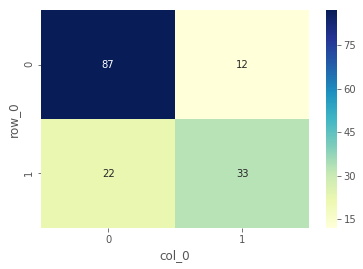

In [20]:
# With MinMax Scaling 
MMS = MinMaxScaler()

X_train_scaled = MMS.fit_transform(X_train)
X_test_scaled = MMS.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test_scaled)
print("Logistic regressin Report (MinMax Scaling):")
evaluation(y_test,y_pred)

**Data Scaling and Normalization perform the same so, I will try parameter tuning to see if it will perform better**


Feature: 0, Score: 0.83993
Feature: 1, Score: 3.70291
Feature: 2, Score: -1.07395
Feature: 3, Score: 0.15553
Feature: 4, Score: -0.14099
Feature: 5, Score: 2.58524
Feature: 6, Score: 0.98352
Feature: 7, Score: 1.70806


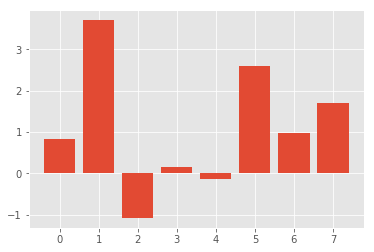

In [21]:
# Features: Pregnancies, Glucose,	BloodPressure,	SkinThickness,	Insulin, BMI,	DiabetesPedigreeFunction,	Age
# get importance 
importance = lr.coef_[0]
# summarize feature importance for normalized model
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();

#### **From the above figure, we can draw the following:**

*   Glucose, BMI, Age, pregnancies and diabetes pedigree function have significant positive influence on the model, specially glucose level and BMI.

*   Blood pressure and Insulin rate have a negative influence on the prediction

### **5. Hyperparameter Tuning**

In [22]:
penalty = ['l1', 'l2']
C = [0.0001,0.001,0.01,0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, solver=solver)

grid = GridSearchCV(estimator=lr, param_grid=param_grid, 
                    verbose=1, cv=10)

best_model = grid.fit(X_train_norm, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.1s finished


MSE: 0.233766233766
('Accuracy Score:', 0.7662337662337663)
('Precision:', 0.6862745098039216)
('Recall:', 0.6363636363636364)
('F1 Score:', 0.660377358490566)
('Confusion Matrix:\n', array([[83, 16],
       [20, 35]]))


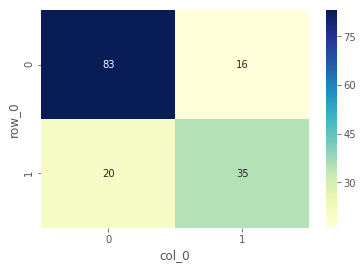

In [23]:
y_pred = best_model.predict(X_test_norm)
evaluation(y_test, y_pred)